In [271]:
from datetime import datetime
import pandas as pd
x = pd.date_range(start=datetime(2019, 1, 1), end=datetime(2019, 1, 15), periods=3)
y = [1.2, 1.4, 1.5] 

In [272]:
from scipy import interpolate
f = interpolate.interp1d(x.day_of_year.astype(int), y, fill_value="extrapolate")

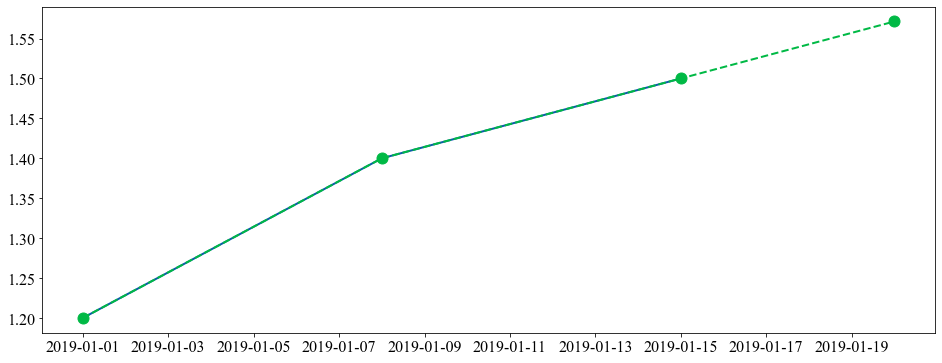

In [290]:
from matplotlib import pyplot as plt
xnew = pd.to_datetime(x.tolist() + [datetime(2019, 1, 20)])
ynew = f(xnew.day_of_year.astype(int))   # use interpolation function returned by `interp1d`
plt.figure(figsize=(16, 6))
plt.plot(x, y, '-', xnew, ynew, '--.')
plt.show()

In [244]:
from statsmodels.tsa.interp.denton import dentonm
indicator = [50, 100, 150, 100] * 3
benchmark = [500, 400, 300]
benchmarked = dentonm(indicator, benchmark, freq="aq")
benchmarked.reshape(3, 4).sum(axis=1)
# output: array([500., 400., 300.])


array([500., 400., 300.])

In [69]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

df_interpolated = df.interpolate(method='linear')

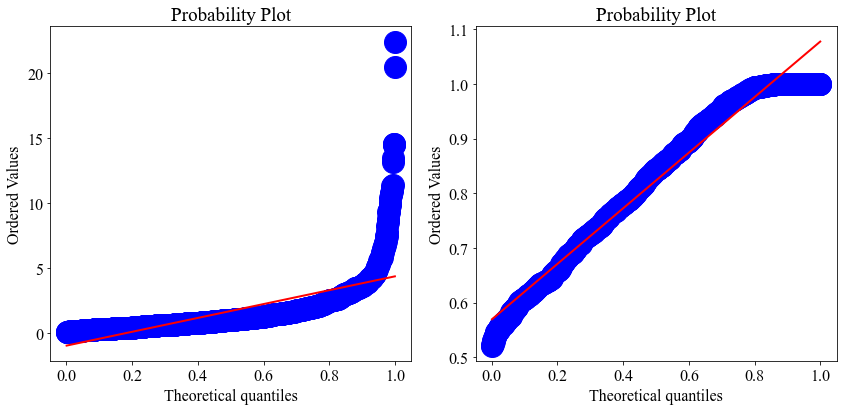

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot, uniform

# Generate data
x = np.random.lognormal(size=1000)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#fig.suptitle('Before and After Quantile Transform')
# Plot data
probplot(x, dist=uniform, plot=axs[0])
# Quantile Transform 
x_transformed = norm.cdf(x)
# Plot transformed data
probplot(x_transformed, dist=uniform, plot=axs[1])
plt.tight_layout()

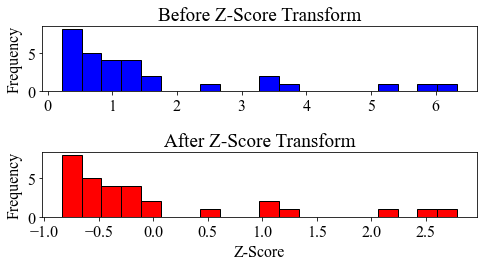

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generate data
x = np.random.lognormal(size=30)

#Calculate z-score
zscore = (x - np.mean(x)) / np.std(x)

#Plot data
plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plt.hist(x, color='blue', edgecolor='black', bins=20)
plt.title('Before Z-Score Transform')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(zscore, color='red', edgecolor='black', bins=20)
plt.title('After Z-Score Transform')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.tight_layout()

(array([ 7., 19., 28., 21., 15.,  6.,  1.,  0.,  2.,  1.]),
 array([-1.66331623, -1.03595566, -0.4085951 ,  0.21876547,  0.84612603,
         1.4734866 ,  2.10084716,  2.72820773,  3.35556829,  3.98292886,
         4.61028942]),
 <BarContainer object of 10 artists>)

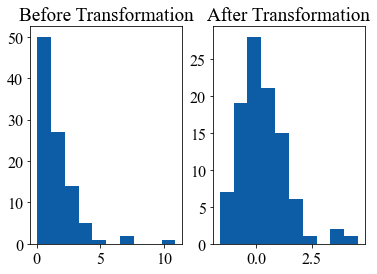

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(1234)
x = np.random.lognormal(size=100)

plt.subplot(1, 2, 1)
# Plot before transformation
plt.title('Before Transformation')
plt.hist(x)

# Apply Box-Cox Transformation
from scipy.stats import boxcox
x_transformed = boxcox(x, lmbda=0.5)
plt.subplot(1, 2, 2)
# Plot after transformation
plt.title('After Transformation')
plt.hist(x_transformed)


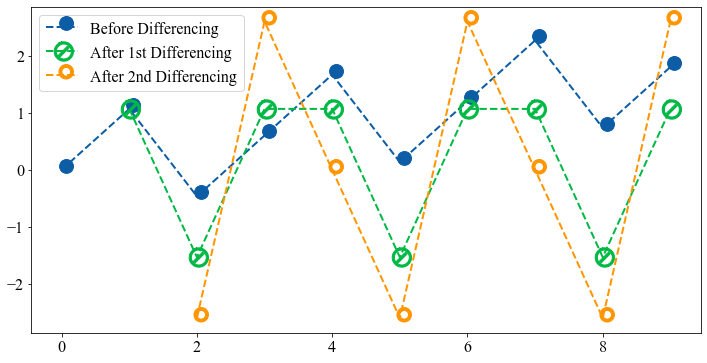

In [246]:
#Import the necessary libraries
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


# Generate a time series with 10 sample points
t = np.arange(10)

# Generate a seasonal pattern of data points
seasonal_data = np.sin(t*2*np.pi/3)

# Generate a trend in the data points
trend_data = 0.2*t

# Combine the trend and seasonal patterns
ts = pd.Series(seasonal_data + trend_data)

#Difference the time series
diff_ts = ts.diff()
diff_ts2 = diff_ts.diff()

plt.figure(figsize=(12, 6))

#Plot the difference
plt.plot(ts, label='Before Differencing')
plt.plot(diff_ts, label='After 1st Differencing')
plt.plot(diff_ts2, label='After 2nd Differencing')

plt.legend()
plt.show()

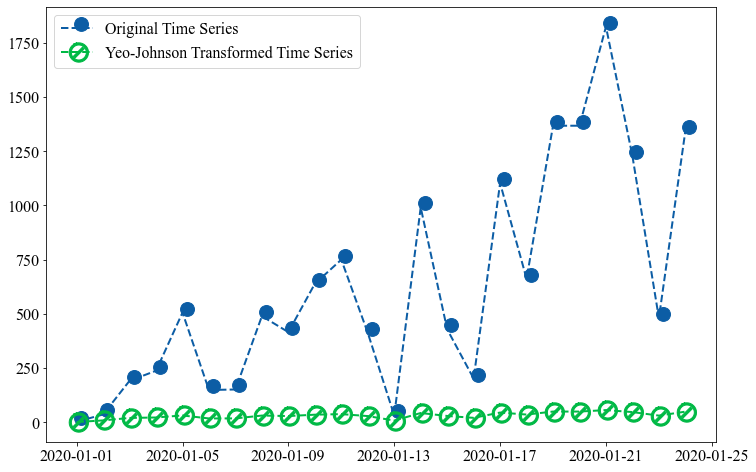

Breusch-Pagan test result before: 0.01485441068223598
Breusch-Pagan test result after Yeo-Johnson transformation: 0.5567965478658754


In [265]:
import pandas as pd
import numpy as np
import scipy.stats as stats

n_points = 24
#Create a time series with multiplicative seasonality
time_series = pd.Series(
    np.random.randint(1, 100, n_points) * np.arange(start=1, stop=n_points+1),
    index = pd.date_range('2020-01-01', '2020-01-24', freq='D'))

#Multiply the time series with a seasonal component
seasonality_factor = np.array([0.8, 1.2, 1.1, 0.9, 1.1, 0.8, 0.9, 1.2, 1.1, 0.9, 1.1, 0.8] * 2)
time_series = time_series * seasonality_factor

#Make the time series homoscedastic using Box-Cox transformations
transformed, _ = stats.boxcox(time_series)
boxcox_transform = pd.Series(transformed, index=time_series.index)

#Visualize the original time series and the Box-Cox transformed time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(time_series, label='Original Time Series')
plt.plot(boxcox_transform, label='Yeo-Johnson Transformed Time Series')
plt.legend()
plt.show()

test_result1 = test_heteroscedasticity(time_series.to_frame().reset_index(), column=0)
#apply Yeo-Johnson transformation to counteract effect of heteroscedasticity
test_result2 = test_heteroscedasticity(boxcox_transform.to_frame().reset_index(), column=0)

print(f"Breusch-Pagan test result before: {test_result1['p-value']}")
# Heteroscedasticity counteracted by Yeo-Johnson?
print(f"Breusch-Pagan test result after Yeo-Johnson transformation: {test_result2['p-value']}")

In [4]:
import pandas as pd

import requests
import pyreadr

def get_energy_demand(scale: bool = True) -> pd.DataFrame:
    resp = requests.get(
        "https://github.com/camroach87/gefcom2017data/raw/master/data/gefcom.rda",
        allow_redirects=True,
    )
    open("gefcom.rda", "wb").write(resp.content)
    result = pyreadr.read_r("gefcom.rda")
    df = result["gefcom"].pivot(index="ts", columns="zone", values="demand")
    df = df.asfreq("D")
    if not scale:
        return df
    return pd.DataFrame(
        data=StandardScaler().fit_transform(df), columns=df.columns, index=df.index
    )

energy = get_energy_demand(scale=False)
df = energy["CT"]

In [84]:
# We can then use scipy to run the unit root and augmented Dickey-Fuller tests on the data, as well as the KPSS and Phillips-Perron tests, in order to check for stationarity and heteroscedasticity in the series: 

from statsmodels.tsa.stattools import adfuller, kpss
# breusch pagan

dickey_fuller_test = adfuller(df)
kpsstest = kpss(df)
print(f"dickey fuller p-value: {dickey_fuller_test[1]}")
print(f"kpsstest p-value: {kpsstest[1]}")

dickey fuller p-value: 1.4219737781553814e-12
kpsstest p-value: 0.01


/var/folders/80/g9sqgdws2rn0yc3rd5y3nd340000gp/T/ipykernel_40315/1483927222.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df)


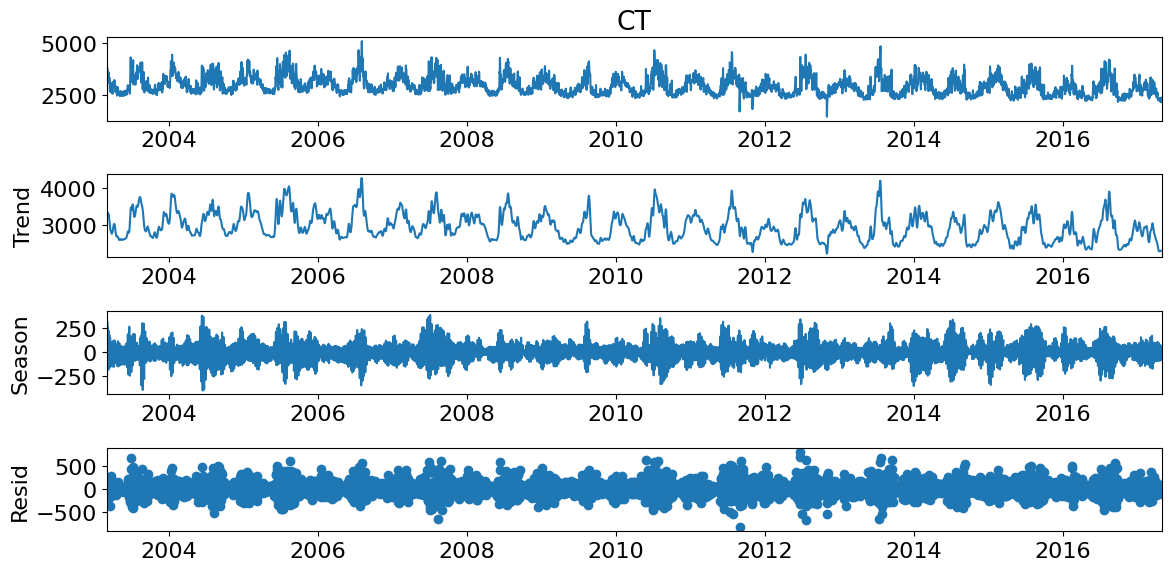

In [68]:
# We can use scipy to fit seasonal adjustment and smoothing techniques to the data, such as the STL decomposition and Holt-Winters methods: 
from statsmodels.tsa.seasonal import STL

stl_smoothed = STL(df).fit()  # Season-Trend decomposition using LOESS
_ = stl_smoothed.plot()

/opt/anaconda3/envs/book/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


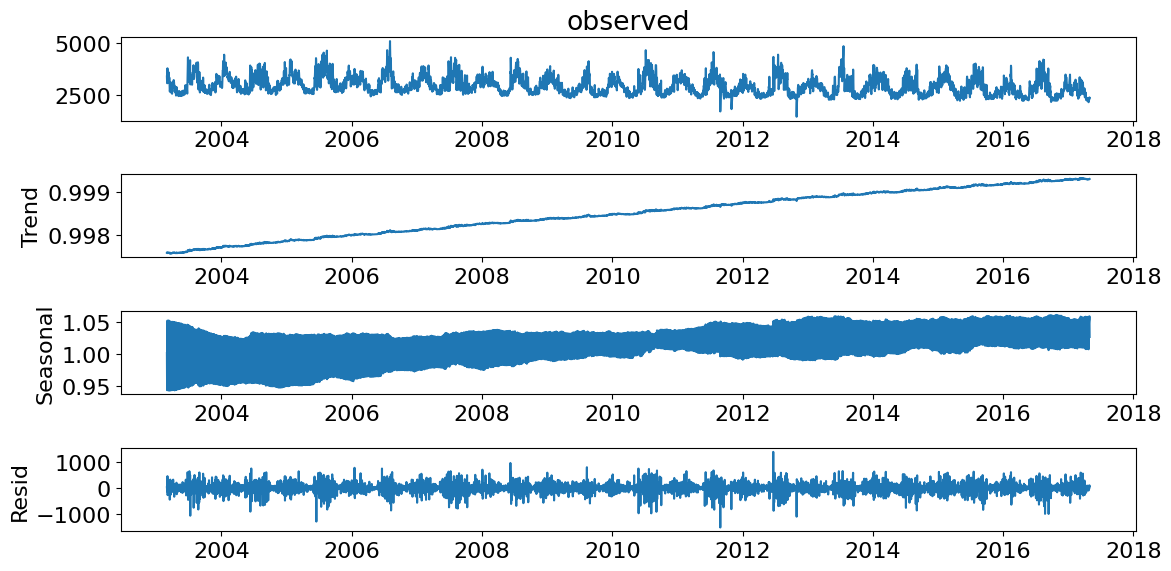

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def decompose_plot(observed, trend, seasonal, resid):
    compose_result = pd.DataFrame({
        "observed": observed, "trend": trend, "seasonal": seasonal, "resid": resid
    })
    xlim = (0, observed.shape[0] - 1)

    fig, axs = plt.subplots(len(compose_result.columns), 1)
    for i, (ax, name) in enumerate(
        zip(axs, ["observed", "trend", "seasonal", "resid"])
    ):
        series = compose_result[name]
        if name != 'residual':
            ax.plot(series)
        else:
            ax.plot(series, marker='o', linestyle='none')
            ax.plot(xlim, (0, 0), color='#000000', zorder=-3)
        if name != 'observed':
            name = name.capitalize()
        title = ax.set_title if i == 0 and name == "observed" else ax.set_ylabel
        title(name)
        #ax.set_xlim(xlim)

    fig.tight_layout()

holt_smoothed = ExponentialSmoothing(df, trend="multiplicative", seasonal="multiplicative").fit()  # Exponential Smoothing

decompose_plot(
    holt_smoothed.data.endog, 
    holt_smoothed.trend, 
    holt_smoothed.season, 
    holt_smoothed.resid
)

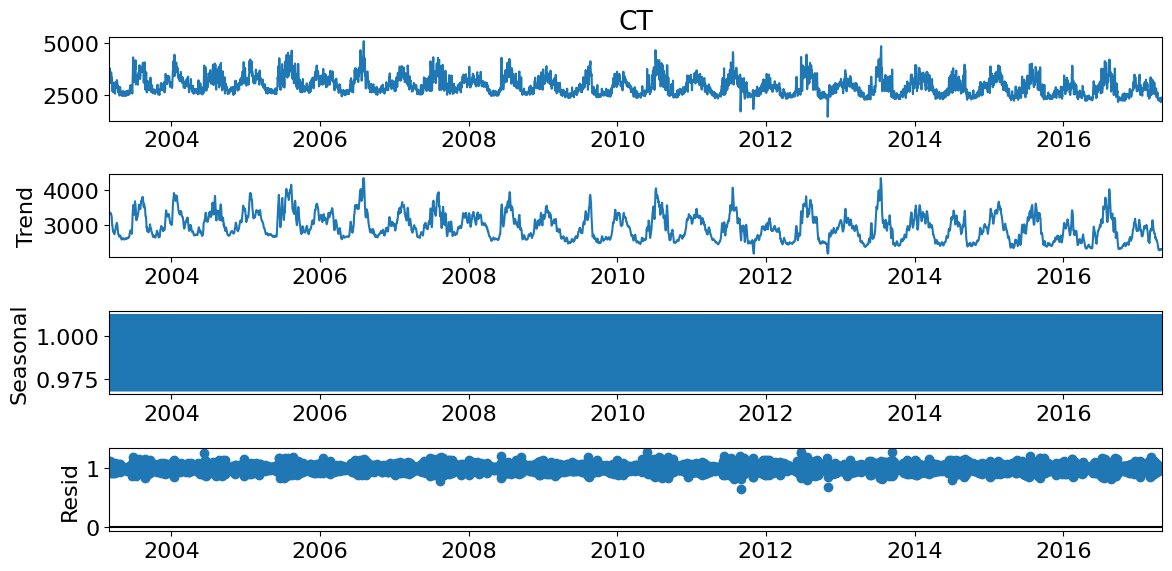

In [41]:
# Seasonal decomposition using moving averages - multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose_result = seasonal_decompose(
    df, model='multiplicative'
)
# Plot data; just use the DecomposeResult.plot() method.
_ = seasonal_decompose_result.plot()

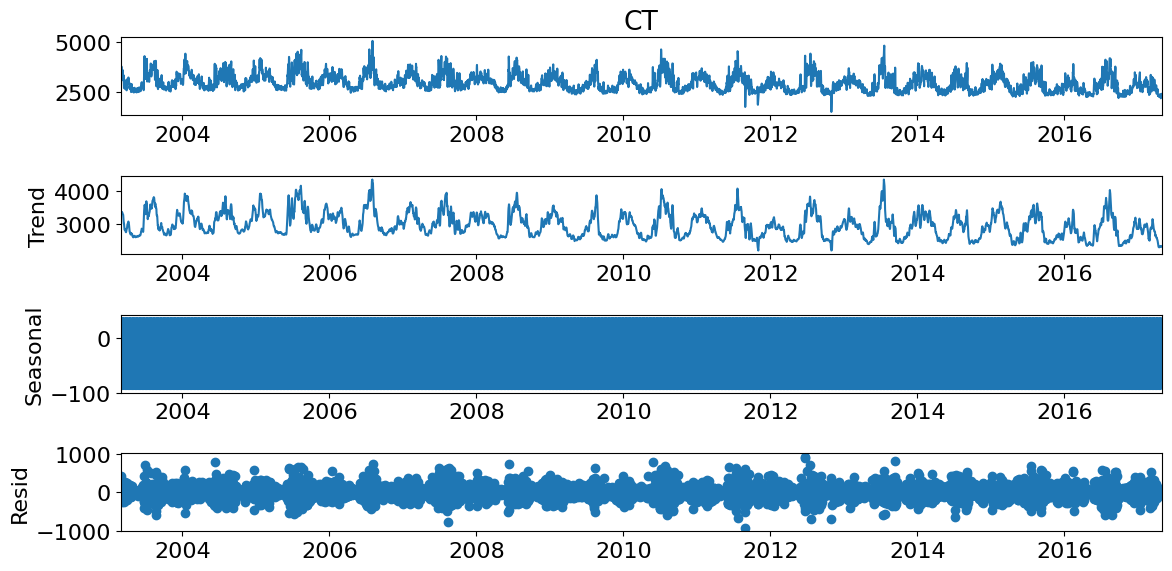

In [14]:
# Seasonal decomposition using moving averages - additive
seasonal_decompose_result = seasonal_decompose(
    df, model='additive'
)
_ = seasonal_decompose_result.plot()

/opt/anaconda3/envs/book/lib/python3.10/site-packages/statsmodels/tsa/x13.py:189: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


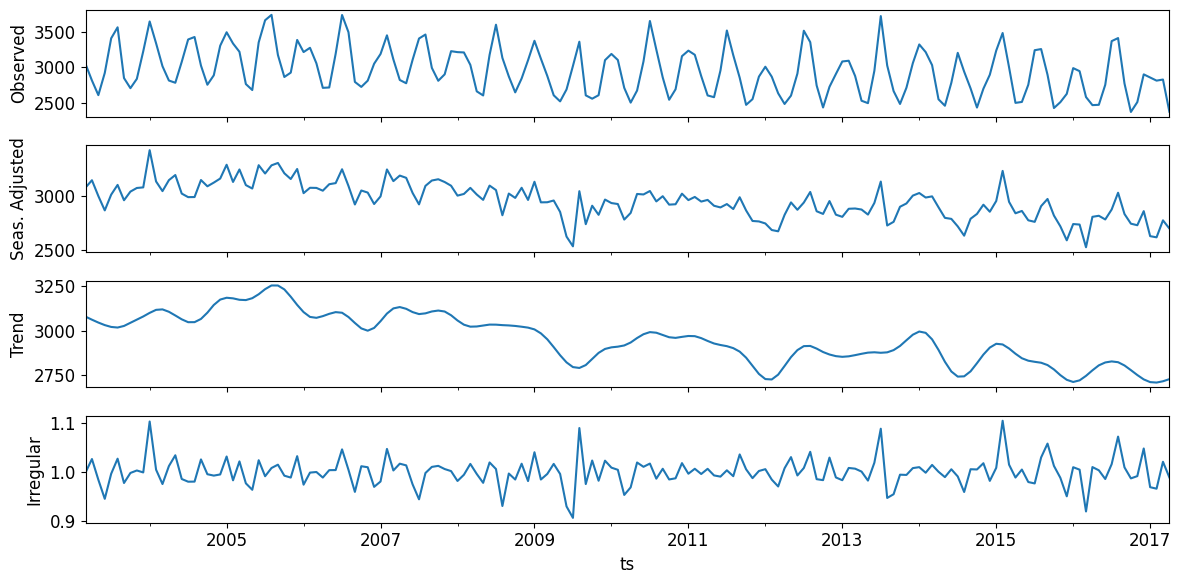

In [20]:
from statsmodels.tsa.x13 import x13_arima_analysis

x12path = "/Users/ben/Downloads/x13as_asciisrc-v1-1-b59"
x13_result = x13_arima_analysis(
    df.resample("M").mean(), x12path=x12path, prefer_x13=True,
)
_ = x13_result.plot()

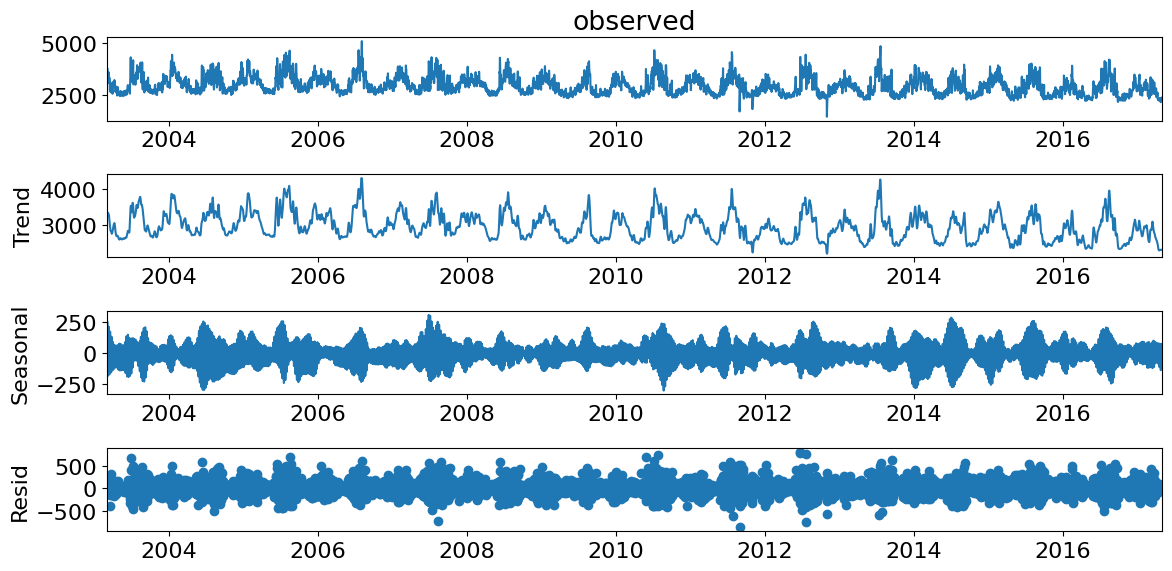

In [16]:
from statsmodels.tsa.seasonal import MSTL

mstl_smoothed = MSTL(df).fit()  # Multi-Seasonal-Trend decomposition using LOESS
_ = mstl_smoothed.plot()

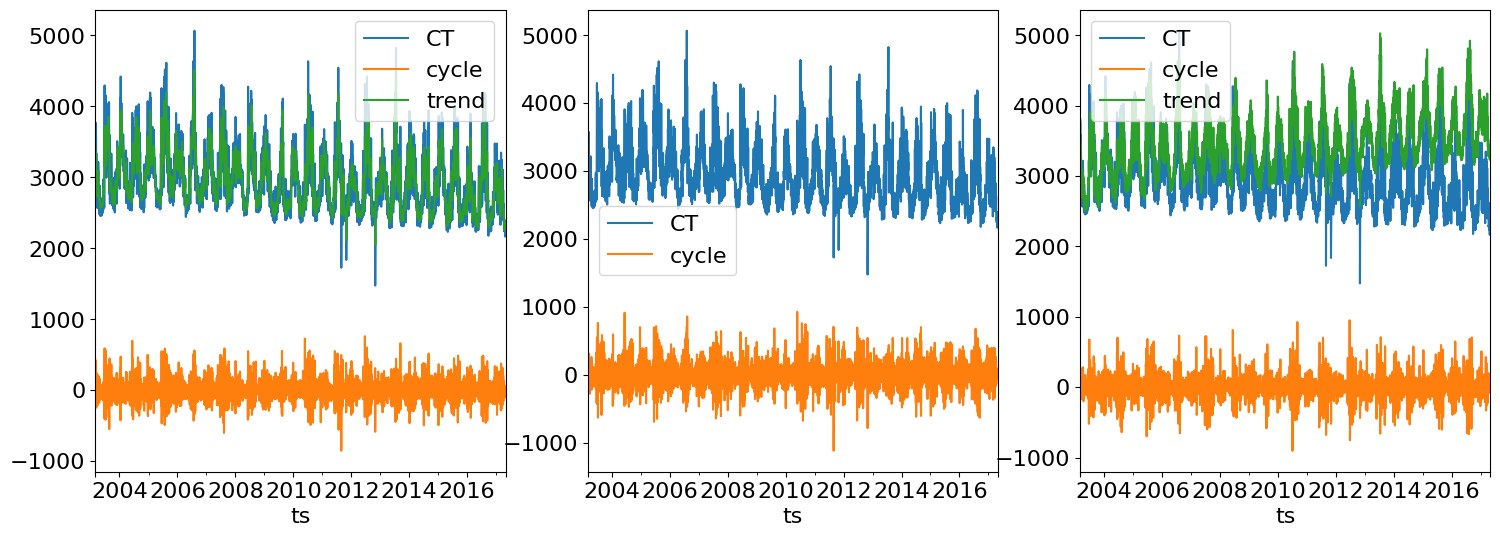

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm

def plot_filter(df, cycle, trend=None, ax=None):
    energy_decomp = df.to_frame().copy()
    energy_decomp["cycle"] = cycle
    if trend is not None:
        energy_decomp["trend"] = trend
    if ax is None:
        plt.figure()
    energy_decomp.plot(ax=ax)

_, axs = plt.subplots(1, 3, figsize=(18, 6))

# Apply Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter(df, 6.25)
plot_filter(df, cycle, trend, axs[0])

# Apply Baxter-King filter
bk_cycle = sm.tsa.filters.bkfilter(df, low=1.5, high=8)
plot_filter(df, bk_cycle, trend=None, ax=axs[1])

# Apply Christiano-Fitzgerald filter
cf_cycle, cf_trend = sm.tsa.filters.cffilter(
    df, low=6, high=32
)
plot_filter(df, cf_cycle, cf_trend, axs[2])

In [242]:
# Calculate the mean and standard deviation of the data
mean = sum(df.values)/len(df)
stdev = (sum([(x-mean)**2 for x in df.values])/len(df))**0.5

# Set the threshold for clipping outliers
threshold = mean + 2*stdev

# Clip outliers
clipped_data = [x for x in df.values if x < threshold]

In [243]:
clipped_data

[array([5.]),
 array([11.]),
 array([16.]),
 array([23.]),
 array([36.]),
 array([58.]),
 array([29.]),
 array([20.]),
 array([10.]),
 array([8.]),
 array([3.]),
 array([0.]),
 array([0.]),
 array([2.]),
 array([11.]),
 array([27.]),
 array([47.]),
 array([63.]),
 array([60.]),
 array([39.]),
 array([28.]),
 array([26.]),
 array([22.]),
 array([11.]),
 array([21.]),
 array([40.]),
 array([78.]),
 array([122.]),
 array([103.]),
 array([73.]),
 array([47.]),
 array([35.]),
 array([11.]),
 array([5.]),
 array([16.]),
 array([34.]),
 array([70.]),
 array([81.]),
 array([111.]),
 array([101.]),
 array([73.]),
 array([40.]),
 array([20.]),
 array([16.]),
 array([5.]),
 array([11.]),
 array([22.]),
 array([40.]),
 array([60.]),
 array([80.9]),
 array([83.4]),
 array([47.7]),
 array([47.8]),
 array([30.7]),
 array([12.2]),
 array([9.6]),
 array([10.2]),
 array([32.4]),
 array([47.6]),
 array([54.]),
 array([62.9]),
 array([85.9]),
 array([61.2]),
 array([45.1]),
 array([36.4]),
 array([20.9]),

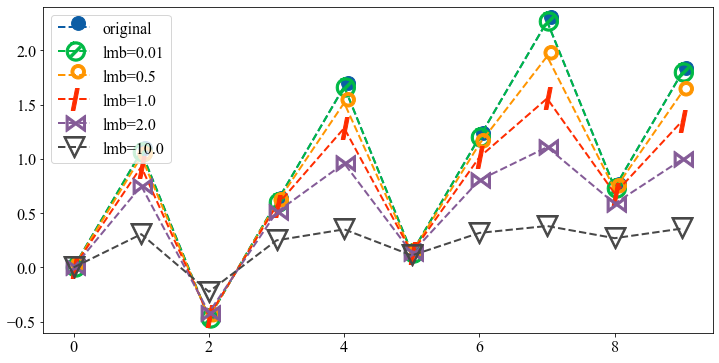

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame()
plt.plot(ts, label="original")
for lmb in [0.01, 0.5, 1.0, 2.0, 10.]:
    df[f"lmd={lmb}"] = np.arcsinh(ts * lmb) / lmb
    plt.plot(df[f"lmd={lmb}"], label=f"lmb={lmb}")
plt.legend()

In [262]:
import pandas as pd

# Create a dataframe with weekly data
data = {'time': pd.date_range(start="2022-01-01", periods=2, freq="W"),
        'value': [1, 2]}
df = pd.DataFrame(data)

# Resample the data to daily data
df_daily = df.resample('D', on='time').sum()

# Print the resampled data
print(df_daily)

            value
time             
2022-01-02      1
2022-01-03      0
2022-01-04      0
2022-01-05      0
2022-01-06      0
2022-01-07      0
2022-01-08      0
2022-01-09      2


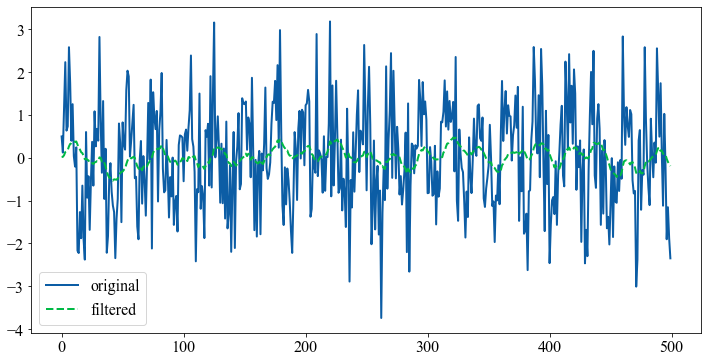

In [300]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate a random time series
np.random.seed(42)
x = np.random.randn(500)

# Generate a seasonal component
a = np.sin(np.arange(500) * 2 * np.pi / 24)

# Add the seasonal component to the time series
x += a

# Plot the original time series
plt.plot(x, "-", label="original")

# Create a filter
b = np.ones(30) / 30
# Filter the time series
y = lfilter(b, 1, x)
# Plot the filtered time series
plt.plot(y, "--", label="filtered")
plt.legend()
plt.show()
